In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib.gridspec import GridSpec
from matplotlib import cm

In [2]:
from plot_config import *
from utils import *

In [24]:
bins = 5
b = slice(None,None,bins)
bb= (b,b)

In [4]:
ds4 = open_domain4()
dsa = open_domain_all()

In [5]:
just_for_time = '/sciserver/filedb10-01/ocean/wenrui_temp/vol_budget'

rtime = np.array(xr.open_zarr(just_for_time).time)
ptime = np.linspace(0,3655,3650)/365
salty_time = rtime[salty_idate - np.arange(len(ptime))]
fresh_time = rtime[fresh_idate - np.arange(len(ptime))]

/tmp/ipykernel_1746308/965469310.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(ticklabs, fontsize=6,rotation = 90,va = 'center')
/tmp/ipykernel_1746308/965469310.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(ticklabs, fontsize=6,rotation = 90,va = 'center')
/tmp/ipykernel_1746308/965469310.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(ticklabs, fontsize=6,rotation = 90,va = 'center')
/tmp/ipykernel_1746308/965469310.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(ticklabs, fontsize=6,rotation = 90,va = 'center')
/tmp/ipykernel_1746308/9

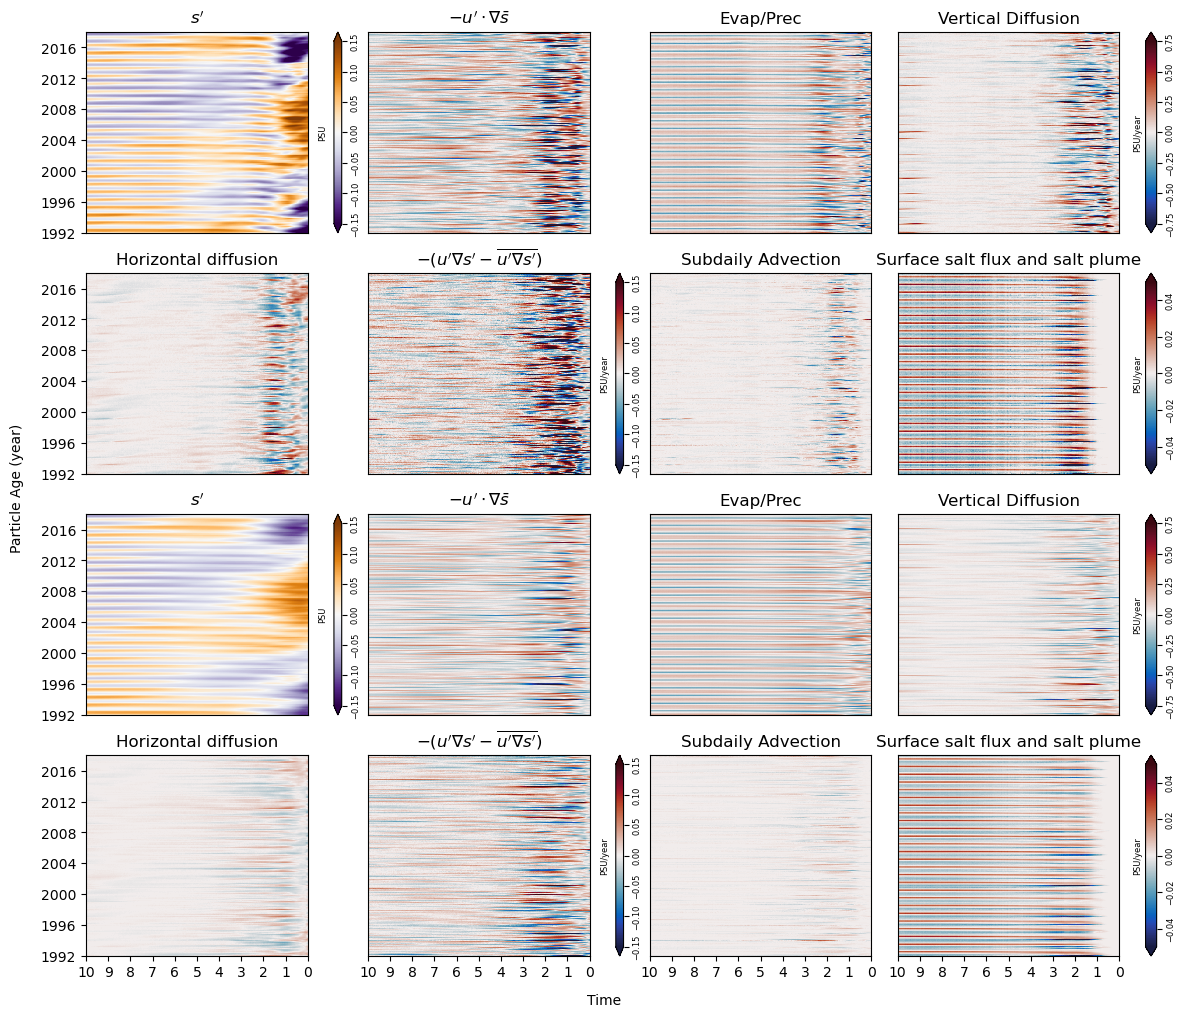

In [25]:
small = 0.035
aa = 12
svmax = 0.15
vmax0 = 0.75
vmax1 = 0.15
vmax2 = 0.05

a = aa*(3*small+4+0.5)/4
fig = plt.figure(figsize=(a,aa))
gs = GridSpec(4, 7, width_ratios=[1,small, 1,small, 1, 1, 0.05])
axs = np.array([[plt.subplot(gs[i,j]) for j in [0,2,4,5] ] for i in range(4)])
# fig,axs = plt.subplots(4,4, figsize = (16,16),sharey = True,subplot_kw={'xlim':(0,10)})
axs = axs.ravel()
order = ['sf']+ rhs_list
titles = [r"$s'$"]+[term_dic[i] for i in rhs_list]
for i,var in enumerate(order):
    if 's' in var:
        vmax = svmax
        cmap = s_cmap
        ratio4 = 1
        ratioa = 1
        axs[i].plot(ptime,salty_time,'--', color = salty_theme_color)
        axs[i].plot(ptime,fresh_time,'--', color = fresh_theme_color)
        axs[i+8].plot(ptime,salty_time,'--', color = salty_theme_color)
        axs[i+8].plot(ptime,fresh_time,'--', color = fresh_theme_color)
    else:
        if i >5:
            vmax = vmax2
        elif i >3:
            vmax = vmax1
        else:
            vmax = vmax0
        cmap = term_cmap
        ratio4 = -1/NUMBER_OF_PARTICLE_domain4*365.2422
        ratioa = -1/NUMBER_OF_PARTICLE_domain_all*365.2422
    axs[i].pcolormesh(-ptime[b],rtime[b],ds4[var][bb]*ratio4,vmax = vmax, vmin = -vmax, cmap = cmap)
    axs[i+8].pcolormesh(-ptime[b],rtime[b],dsa[var][bb]*ratioa,vmax = vmax, vmin = -vmax, cmap = cmap)
    axs[i].set_title(titles[i])
    axs[i+8].set_title(titles[i])


# aspect = float(rtime[0]-rtime[1])/(ptime[0]-ptime[-1])/7e15
for i,ax in enumerate(axs):
    ax.set_xlim(-10,0)
    # ax.set_aspect(aspect)
    if i<12:
        ax.set_xticks([])
    else:
        ax.set_xticks(-np.arange(11), [str(i) for i in range(11)])
    if i%4!=0:
        ax.set_yticks([])

for (label,vmax,cmap,i,j) in [
    ('PSU',svmax,s_cmap,0,1),
    ('PSU/year',vmax0,term_cmap,0,6),
    ('PSU/year',vmax1,term_cmap,1,3),
    ('PSU/year',vmax2,term_cmap,1,6),
]:
    for hey in [0,2]:
        cbar = plt.colorbar(
            cm.ScalarMappable(
                norm = mpl.colors.Normalize(vmin=-vmax, vmax=vmax),
                cmap = cmap
            ),
            cax = plt.subplot(gs[i+hey,j]),
            extend = 'both',
        )
        cbar.ax.tick_params(axis='y', which='major', pad=3)
        cbar.ax.set_ylabel(label,labelpad = -30,fontsize = 6)
        ticklabs = cbar.ax.get_yticklabels()
        cbar.ax.set_yticklabels(ticklabs, fontsize=6,rotation = 90,va = 'center')
# plt.tight_layout()
# fig.add_subplot(111, frameon=False)
# plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
# plt.xlabel('Time')
# plt.ylabel('Particle Age (year)')
# fig.supxlabel('Time')
# fig.supylabel('Particle Age (year)')
fig.text(0.5, 0.07, 'Time', ha='center')
fig.text(0.07, 0.5, 'Particle Age (year)', va='center', rotation='vertical')
plt.savefig('figure8.png',dpi = dpi)